In [19]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from tqdm import tqdm
from matplotlib import pyplot as plt
from IPython.display import display
from collections import Counter
import datetime
from dateutil.parser import parse
ua = UserAgent()
import os
import glob

In [2]:
dir_ = r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks"
dir_list = glob.glob(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks\*.txt")

In [3]:
li_2 = []
for i in dir_list:
    li_2.append(i.replace(dir_,"").replace(".txt","").replace("\\","").replace(".us","").upper())

In [11]:
li_2[10]

'AAON'

In [7]:
nasdaq = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\NASDAQ.csv")
nyse = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\NYSE.csv")
amex = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\AMEX.csv")
nas_2 = nasdaq.loc[:,["Symbol","Sector","industry"]]
nys_2 = nyse.loc[:,["Symbol","Sector","industry"]]
amex_2 = amex.loc[:,["Symbol","Sector","industry"]]
indu_all = pd.concat([nas_2,nys_2,amex_2])

In [12]:
sample = pd.read_csv(r"C:\Users\Samsung\Desktop\수업\2020_1\AI\final\4538_7213_bundle_archive\Data\Stocks\AAON.us.txt")
sample["Date"] = pd.to_datetime(sample["Date"].map(lambda x: parse(x).strftime("%Y")))
date_list=list(sample["Date"].value_counts().keys())

In [13]:
sample

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-01-01,2.7985,2.8152,2.7679,2.7958,47033,0
1,2005-01-01,2.7595,2.8540,2.7486,2.8540,58791,0
2,2005-01-01,2.8540,2.8540,2.7541,2.8095,88448,0
3,2005-01-01,2.8124,2.8485,2.7595,2.8235,130879,0
4,2005-01-01,2.7875,2.8540,2.7541,2.8317,117092,0
...,...,...,...,...,...,...,...
3196,2017-01-01,34.5000,34.7500,34.2500,34.6500,107802,0
3197,2017-01-01,34.6500,34.7500,34.4000,34.6000,180383,0
3198,2017-01-01,34.5000,35.2500,34.1000,34.4250,102899,0
3199,2017-01-01,34.1500,34.5000,33.3000,33.3500,150974,0


In [10]:
nasdaq

,Symbol,Name,LastSale,MarketCap,IPOyear,Sector,industry,Summary Quote,Unnamed: 8
0,TXG,"10x Genomics, Inc.",86.2500,$8.48B,2019.0,Capital Goods,Biotechnology: Laboratory Analytical Instruments,https://old.nasdaq.com/symbol/txg,NaN
1,YI,"111, Inc.",6.7800,$558.4M,2018.0,Health Care,Medical/Nursing Services,https://old.nasdaq.com/symbol/yi,NaN
2,PIH,"1347 Property Insurance Holdings, Inc.",4.4201,$26.82M,2014.0,Finance,Property-Casualty Insurers,https://old.nasdaq.com/symbol/pih,NaN
3,PIHPP,"1347 Property Insurance Holdings, Inc.",25.3000,NaN,NaN,Finance,Property-Casualty Insurers,https://old.nasdaq.com/symbol/pihpp,NaN
4,TURN,180 Degree Capital Corp.,1.7800,$55.4M,NaN,Finance,Finance/Investors Services,https://old.nasdaq.com/symbol/turn,NaN
...,...,...,...,...,...,...,...,...,...
3627,ZS,"Zscaler, Inc.",106.0000,$13.83B,2018.0,Technology,EDP Services,https://old.nasdaq.com/symbol/zs,NaN
3628,ZUMZ,Zumiez Inc.,25.9200,$659.17M,2005.0,Consumer Services,Clothing/Shoe/Accessory Stores,https://old.nasdaq.com/symbol/zumz,NaN
3629,ZYNE,"Zynerba Pharmaceuticals, Inc.",6.3000,$157.19M,2015.0,Health Care,Major Pharmaceuticals,https://old.nasdaq.com/symbol/zyne,NaN
3630,ZYXI,"Zynex, Inc.",22.8200,$757.45M,NaN,Health Care,Biotechnology: Electromedical & Electrotherape...,https://old.nasdaq.com/symbol/zyxi,NaN


In [14]:
indu_all

,Symbol,Sector,industry
0,TXG,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,YI,Health Care,Medical/Nursing Services
2,PIH,Finance,Property-Casualty Insurers
3,PIHPP,Finance,Property-Casualty Insurers
4,TURN,Finance,Finance/Investors Services
...,...,...,...
290,WYY,Technology,EDP Services
291,WTT,Capital Goods,Electrical Products
292,XTNT,Health Care,Biotechnology: Biological Products (No Diagnos...
293,ZDGE,Technology,Computer Software: Prepackaged Software


In [60]:
target = amex

eda_1 = target["Sector"].value_counts()
senu = pd.DataFrame(eda_1)
senu

,Sector
Basic Industries,47
Health Care,43
Energy,25
Consumer Services,25
Capital Goods,17
Technology,15
Finance,12
Consumer Non-Durables,8
Miscellaneous,5
Public Utilities,5


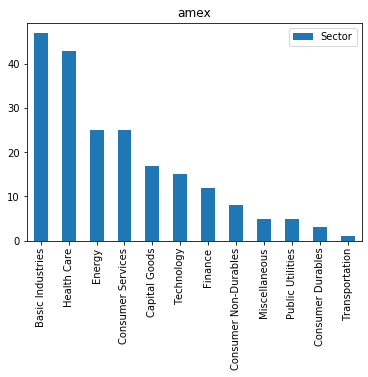

In [61]:
senu.plot(kind="bar",title="amex")


In [63]:
eda_1 = target["industry"].value_counts()[0:30]
senu = pd.DataFrame(eda_1)
senu

,industry
Precious Metals,39
Oil & Gas Production,19
Major Pharmaceuticals,16
Real Estate Investment Trusts,11
Industrial Machinery/Components,10
Biotechnology: Biological Products (No Diagnostic Substances),7
Medical/Dental Instruments,6
Major Banks,5
Mining & Quarrying of Nonmetallic Minerals (No Fuels),4
Oilfield Services/Equipment,3


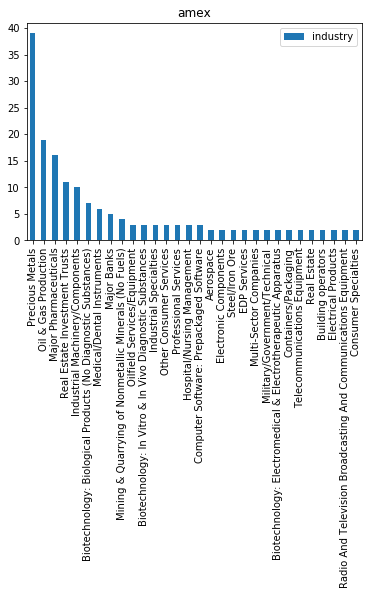

In [64]:
senu.plot(kind="bar",title="amex")

In [ ]:
target = nasdaq

eda_1 = target["Sector"].value_counts()
senu = pd.DataFrame(eda_1)
senu

In [ ]:
senu.plot(kind="bar",title="NASDAQ")

In [ ]:
eda_1 = target["industry"].value_counts()#[0:30]
senu = pd.DataFrame(eda_1)
senu

In [ ]:
senu.plot(kind="bar",title="NASDAQ")